In [1]:
import numpy as np
import keras
import tensorflow as tf
from keras.layers import Activation,Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
mobile = keras.applications.mobilenet.MobileNet()

In [3]:
def preprocess_data(path,file):
    img = image.load_img(str(path) + '/' + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis =0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded)

In [5]:
shutil.move?

Signature: shutil.move(src, dst, copy_function=<function copy2 at 0x7f747b411b90>)
Docstring:
Recursively move a file or directory to another location. This is
similar to the Unix "mv" command. Return the file or directory's
destination.

If the destination is a directory or a symlink to a directory, the source
is moved inside the directory. The destination path must not already
exist.

If the destination already exists but is not a directory, it may be
overwritten depending on os.rename() semantics.

If the destination is on our current filesystem, then rename() is used.
Otherwise, src is copied to the destination and then removed. Symlinks are
recreated under the new name if os.rename() fails because of cross
filesystem renames.

The optional `copy_function` argument is a callable that will be used
to copy the source or it will be delegated to `copytree`.
By default, copy2() is used, but any function that supports the same
signature (like copy()) can be used.

A lot more could be don

In [6]:
random.sample?

Signature: random.sample(population, k)
Docstring:
Chooses k unique random elements from a population sequence or set.

Returns a new list containing elements from the population while
leaving the original population unchanged.  The resulting list is
in selection order so that all sub-slices will also be valid random
samples.  This allows raffle winners (the sample) to be partitioned
into grand prize and second place winners (the subslices).

Members of the population need not be hashable or unique.  If the
population contains repeats, then each occurrence is a possible
selection in the sample.

To choose a sample in a range of integers, use range as an argument.
This is especially fast and space efficient for sampling from a
large population:   sample(range(10000000), 60)
File:      ~/anaconda3/lib/python3.7/random.py
Type:      method


In [7]:
os.listdir()

['Sign Lang.ipynb',
 'validation',
 '.ipynb_checkpoints',
 'test',
 'train',
 '.git']

In [8]:
# Initial Test
if os.path.isdir('train/0')  is False:
    os.mkdir('train')
    os.mkdir('validation')
    os.mkdir('test')
    for i in range (0,10):
        shutil.move(f'{i}','train')
        #Moves 0 - 9 folders to train
        os.mkdir(f'validation/{i}')
        os.mkdir(f'test/{i}')

        
        valid_samples = random.sample(os.listdir(f'train/{i}'),30)
        for j in valid_samples:    
            shutil.move(f'train/{i}/{j}',f'validation/{i}')
            
        test_samples = random.sample(os.listdir(f'train/{i}'),5)
        for j in test_samples:    
            shutil.move(f'train/{i}/{j}',f'test/{i}')

In [9]:
os.listdir()

['Sign Lang.ipynb',
 'validation',
 '.ipynb_checkpoints',
 'test',
 'train',
 '.git']

In [10]:
train_path = 'train'
valid_path = 'validation'
test_path = 'test'

In [11]:
ImageDataGenerator?

Init signature:
ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format='channels_last',
    validation_split=0.0,
    interpolation_order=1,
    dtype='float32',
)
Docstring:     
Generate batches of tensor image data with real-time data augmentation.
 The data will be looped over (in batches).

# Arguments
    featurewise_center: Boolean.
        Set input mean to 0 over the dataset, feature-wise.
    samplewise_center: Boolean. Set each sample mean to 0.
    featurewise_std_normalization: Boolean.
        Di

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size = (224,224), batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size = (224,224), batch_size = 10)
    
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size = (224,224), batch_size = 10, shuffle = False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [13]:
mobile = keras.applications.mobilenet.MobileNet()

In [14]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [15]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [16]:
Model?

Init signature: Model(*args, **kwargs)
Docstring:     
The `Model` class adds training & evaluation routines to a `Network`.
    
File:           ~/anaconda3/lib/python3.7/site-packages/keras/engine/training.py
Type:           type
Subclasses:     Sequential


In [17]:
model = Model(inputs = mobile.input, outputs= output)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [19]:
i = 0
for l in model.layers:
    i += 1
print(i)

89


In [20]:
#Just a choice ... Lets train only last 23
for l in model.layers[:-23]:
    l.trainable = False

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [22]:
model.compile?

Signature:
model.compile(
    optimizer,
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    **kwargs,
)
Docstring:
Configures the model for training.

# Arguments
    optimizer: String (name of optimizer) or optimizer instance.
        See [optimizers](/optimizers).
    loss: String (name of objective function) or objective function or
        `Loss` instance. See [losses](/losses).
        If the model has multiple outputs, you can use a different loss
        on each output by passing a dictionary or a list of losses.
        The loss value that will be minimized by the model
        will then be the sum of all individual losses.
    metrics: List of metrics to be evaluated by the model
        during training and testing. Typically you will use
        `metrics=['accuracy']`. To specify different metrics for different
        outputs of a multi-output model, you could also pass a dictionary,
  

In [23]:
model.compile(optimizer=Adam(lr=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x=train_batches,validation_data=valid_batches,epochs = 30, verbose=2)

Epoch 1/30
 - 230s - loss: 0.4758 - accuracy: 0.8464 - val_loss: 1.7539 - val_accuracy: 0.5433
Epoch 2/30
 - 223s - loss: 0.0872 - accuracy: 0.9755 - val_loss: 0.1956 - val_accuracy: 0.8133
Epoch 3/30
 - 215s - loss: 0.0765 - accuracy: 0.9737 - val_loss: 0.5602 - val_accuracy: 0.7267
Epoch 4/30
 - 208s - loss: 0.0486 - accuracy: 0.9836 - val_loss: 0.3862 - val_accuracy: 0.8467
Epoch 5/30
 - 230s - loss: 0.0532 - accuracy: 0.9790 - val_loss: 0.0110 - val_accuracy: 0.9333
Epoch 6/30
 - 223s - loss: 0.0332 - accuracy: 0.9871 - val_loss: 0.0184 - val_accuracy: 0.9333
Epoch 7/30
 - 212s - loss: 0.0477 - accuracy: 0.9895 - val_loss: 0.0041 - val_accuracy: 0.9867
Epoch 8/30
 - 209s - loss: 0.0059 - accuracy: 0.9977 - val_loss: 0.0176 - val_accuracy: 0.9600
Epoch 9/30
 - 188s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 2.4255e-04 - val_accuracy: 0.9867
Epoch 10/30
 - 233s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 7.0692e-04 - val_accuracy: 0.9900
Epoch 11/30
 - 262s - loss: 0.0065 - accu

In [28]:
model.save('sign.h5')

In [25]:
test_label = test_batches.classes

In [26]:
predictions = model.predict(x=test_batches, verbose=0)

In [41]:
pred = predictions.argmax(axis=1)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
y_true = []
for i in range(0,10):
    for j in range(0,5):
        y_true.append(i)
y_true = np.array(y_true)

In [47]:
mat = confusion_matrix(y_true = y_true , y_pred = pred)

In [49]:
mat

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]])

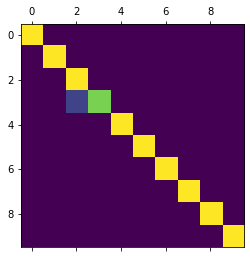

In [48]:
plt.matshow(mat)

In [51]:
plt.matshow?

Signature: plt.matshow(A, fignum=None, **kwargs)
Docstring:
Display an array as a matrix in a new figure window.

The origin is set at the upper left hand corner and rows (first
dimension of the array) are displayed horizontally.  The aspect
ratio of the figure window is that of the array, unless this would
make an excessively short or narrow figure.

Tick labels for the xaxis are placed on top.

Parameters
----------
A : array-like(M, N)
    The matrix to be displayed.

fignum : None or int or False
    If *None*, create a new figure window with automatic numbering.

    If a nonzero integer, draw into the figure with the given number
    (create it if it does not exist).

    If 0, use the current axes (or create one if it does not exist).

    .. note::

       Because of how `.Axes.matshow` tries to set the figure aspect
       ratio to be the one of the array, strange things may happen if you
       reuse an existing figure.

Returns
-------
`~matplotlib.image.AxesImage`

Other Pa